# OpenIntro Statistics - Chapter 3 : Probability (Probabilité/概率)
**Titanic Survival Analysis (Titanic dataset)**
>**Source**: *OpenIntro Statistics*(4th ed.)  
>**Core Principle**:*'Variable type determines analysis method'*<br>
[OpenIntro Ch 3 Theory summary](../references/openintro_ch3_summary.md)

In [2]:
# OpenIntro Ch 3: Probability — Setup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy import stats
import os
import warnings

 # Makes output cleaner for presentations
warnings.filterwarnings('ignore') 

# set visual style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
try:
    plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS', 'DejaVu Sans']
    plt.rcParams['axes.unicode_minus'] = False
except:
    pass

# load titanic dataset. df is pandas dataframe
df = sns.load_dataset('titanic')
display(df.head(3))

print("*"*70)
print("OpenIntro Statistics — Chapter 3: Probability")
print("*"*70)
print(f"• Dataset: Titanic passengers (n = {len(df)})")
print(f"• Key variables: survived (binary), sex (nominal), pclass (ordinal)")
print(f"• Base survival rate: {df['survived'].mean()*100:.1f}%")
print("\nChapter 3 Core Concepts:")
print("  1. Conditional Probability: P(A|B) ≠ P(B|A)")
print("  2. Bayes' Theorem: Updating beliefs with evidence")
print("  3. Law of Large Numbers: Sample mean → Population mean as n increases")
print("  4. Independence: P(A∩B) = P(A)P(B)?")
print("  5. Sampling Bias: Survivorship bias in observational data")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


**********************************************************************
OpenIntro Statistics — Chapter 3: Probability
**********************************************************************
• Dataset: Titanic passengers (n = 891)
• Key variables: survived (binary), sex (nominal), pclass (ordinal)
• Base survival rate: 38.4%

Chapter 3 Core Concepts:
  1. Conditional Probability: P(A|B) ≠ P(B|A)
  2. Bayes' Theorem: Updating beliefs with evidence
  3. Law of Large Numbers: Sample mean → Population mean as n increases
  4. Independence: P(A∩B) = P(A)P(B)?
  5. Sampling Bias: Survivorship bias in observational data


**********************************************************************
Step 1: Conditional Probability — Why P(A|B) ≠ P(B|A)
**********************************************************************

Titanic Probability Calculations:
  Total passengers:891
  Total survived passengers:342
  Total female passengers: 314
  Total survived female:233
  Probability Survived: total survived passengers/total passengers=342/891 (38.4%)
  Probability Female: total female/total passengers=314/891 (35.2%)
  Probability Female & Survived (p(female and survived))=(233/891)/(26.2%)

----------------------------------------------------------------------
CRITICAL INSIGHT (OpenIntro Ch 3.2):
  P(survived | female) = 233/314 = 0.742 (74.2%)
    → 'Among females, 74.2% survived'

  P(female | survived) = 233/342 = 0.681 (68.1%)
    → 'Among survivors, 68.1% were female'

  COMMON MISTAKE: Confusing these two questions!
    KEY PRINCIPLE: Denominators differ → answers differ
----------------------------------

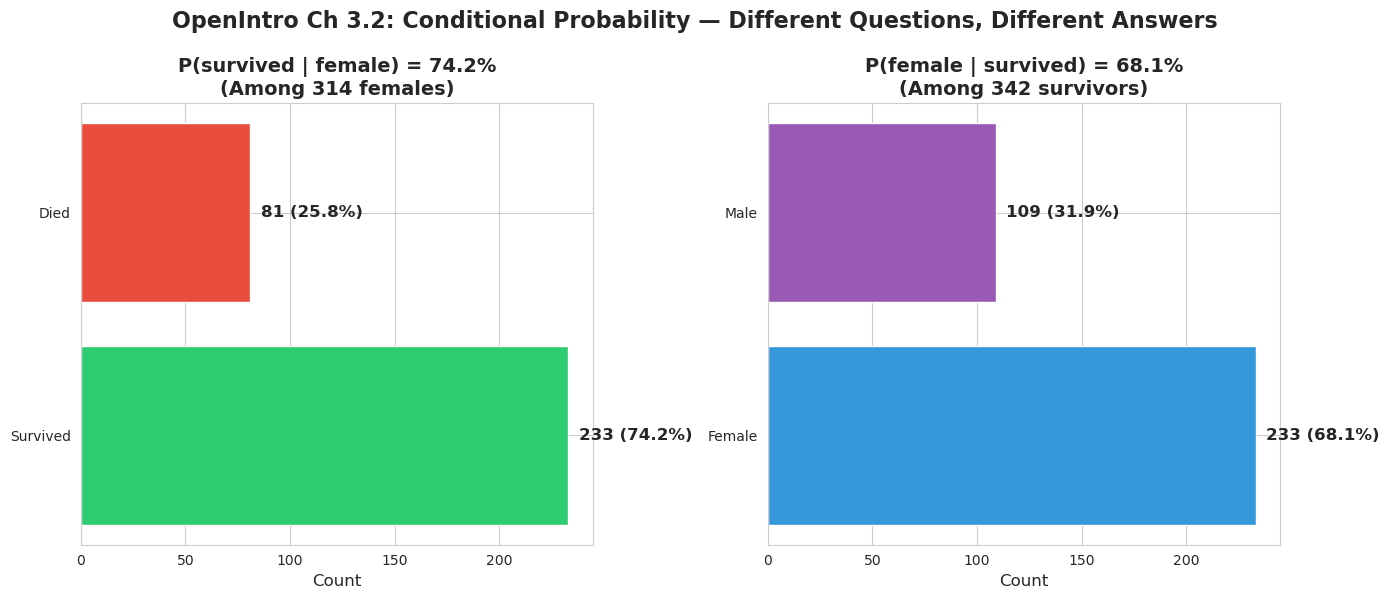


 OpenIntro Principle (Ch 3.2):
  'P(A|B) and P(B|A) answer fundamentally different questions —'
  'confusing them leads to the prosecutor's fallacy in legal contexts'


In [42]:
# OpenIntro Ch 3.2: Conditional Probability — P(A|B) ≠ P(B|A)
print("*"*70)
print("Step 1: Conditional Probability — Why P(A|B) ≠ P(B|A)")
print("*"*70)

# 
total = len(df)
survived = df['survived'].sum() # survived=1 or survived=0, so df['survived'].sum()=0+0+1+1....+1+0 = total survived.
female = (df['sex'] == 'female').sum() # calulate total female
#get the value of total survived female
female_survived = ((df['sex'] == 'female') & (df['survived'] == 1)).sum()

# fomule - Conditional Probability : P(survived | female) = P(survived AND female) / P(female)
p_surv_given_female = female_survived / female
# P(female | survived) = P(female AND survived) / P(survived)
p_female_given_surv = female_survived / survived

print("\nTitanic Probability Calculations:")
print(f"  Total passengers:{total}")
print(f"  Total survived passengers:{survived}")
print(f"  Total female passengers: {female}")
print(f"  Total survived female:{female_survived}")
print(f"  Probability Survived: total survived passengers/total passengers={survived}/{total} ({survived/total*100:.1f}%)")
print(f"  Probability Female: total female/total passengers={female}/{total} ({female/total*100:.1f}%)")
print(f"  Probability Female & Survived (p(female and survived))=({female_survived}/{total})/({female_survived/total*100:.1f}%)") #({female_survived}/{female})*100:.1f}%)")
print("\n" + "-"*70)
print("CRITICAL INSIGHT (OpenIntro Ch 3.2):")
print(f"  P(survived | female) = {female_survived}/{female} = {p_surv_given_female:.3f} (74.2%)")
print(f"    → 'Among females, 74.2% survived'")
print(f"\n  P(female | survived) = {female_survived}/{survived} = {p_female_given_surv:.3f} (68.1%)")
print(f"    → 'Among survivors, 68.1% were female'")
print("\n  COMMON MISTAKE: Confusing these two questions!")
print("    KEY PRINCIPLE: Denominators differ → answers differ")
print("-"*70)

# visualisation
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# left chart：P(survived | female)
#totalfemanle = 314 and survived female = 233
colors_left = ['#2ECC71' if i < female_survived else '#E74C3C' for i in range(female)]
axes[0].barh(
    ['Survived', 'Died'], 
    [female_survived, female - female_survived],
    color=['#2ECC71', '#E74C3C']
)
axes[0].set_title(f'P(survived | female) = {p_surv_given_female:.1%}\n(Among {female} females)', 
                  fontsize=14, fontweight='bold')
axes[0].set_xlabel('Count', fontsize=12)
for i, (label, val) in enumerate(zip(['Survived', 'Died'], [female_survived, female - female_survived])):
    axes[0].text(val + 5, i, f'{val} ({val/female*100:.1f}%)', 
                va='center', fontsize=12, fontweight='bold')

# right chart：P(female | survived)
female_in_survivors = female_survived
male_in_survivors = survived - female_survived
axes[1].barh(['Female', 'Male'], [female_in_survivors, male_in_survivors], 
             color=['#3498DB', '#9B59B6'])
axes[1].set_title(f'P(female | survived) = {p_female_given_surv:.1%}\n(Among {survived} survivors)', 
                  fontsize=14, fontweight='bold')
axes[1].set_xlabel('Count', fontsize=12)
for i, (label, val) in enumerate(zip(['Female', 'Male'], [female_in_survivors, male_in_survivors])):
    axes[1].text(val + 5, i, f'{val} ({val/survived*100:.1f}%)', 
                va='center', fontsize=12, fontweight='bold')

plt.suptitle('OpenIntro Ch 3.2: Conditional Probability — Different Questions, Different Answers', 
             fontsize=16, fontweight='bold', y=0.99)
plt.tight_layout()

#output_path = os.path.join(os.getcwd(), 'reports', 'figures', 'ch3_conditional_probability.png')
#plt.savefig(output_path, dpi=300, bbox_inches='tight')
#print(f"\n SUCCESS: Conditional probability visualization saved to {output_path}")
plt.show()

print("\n OpenIntro Principle (Ch 3.2):")
print("  'P(A|B) and P(B|A) answer fundamentally different questions —'")
print("  'confusing them leads to the prosecutor's fallacy in legal contexts'")


**********************************************************************
 Step 2: Bayes' Theorem — Updating Beliefs with Evidence
**********************************************************************

Bayes' Theorem Calculation:
  Prior: P(Female) = 0.352
  Likelihood: P(Survived | Female) = 0.742
  Evidence: P(Survived) = 0.384
  Posterior: P(Female | Survived) = (0.742 × 0.352) / 0.384
             = 0.681 (68.1%)

  Verification: Direct calculation = 0.681
     Difference: 0.000000 (numerical precision)


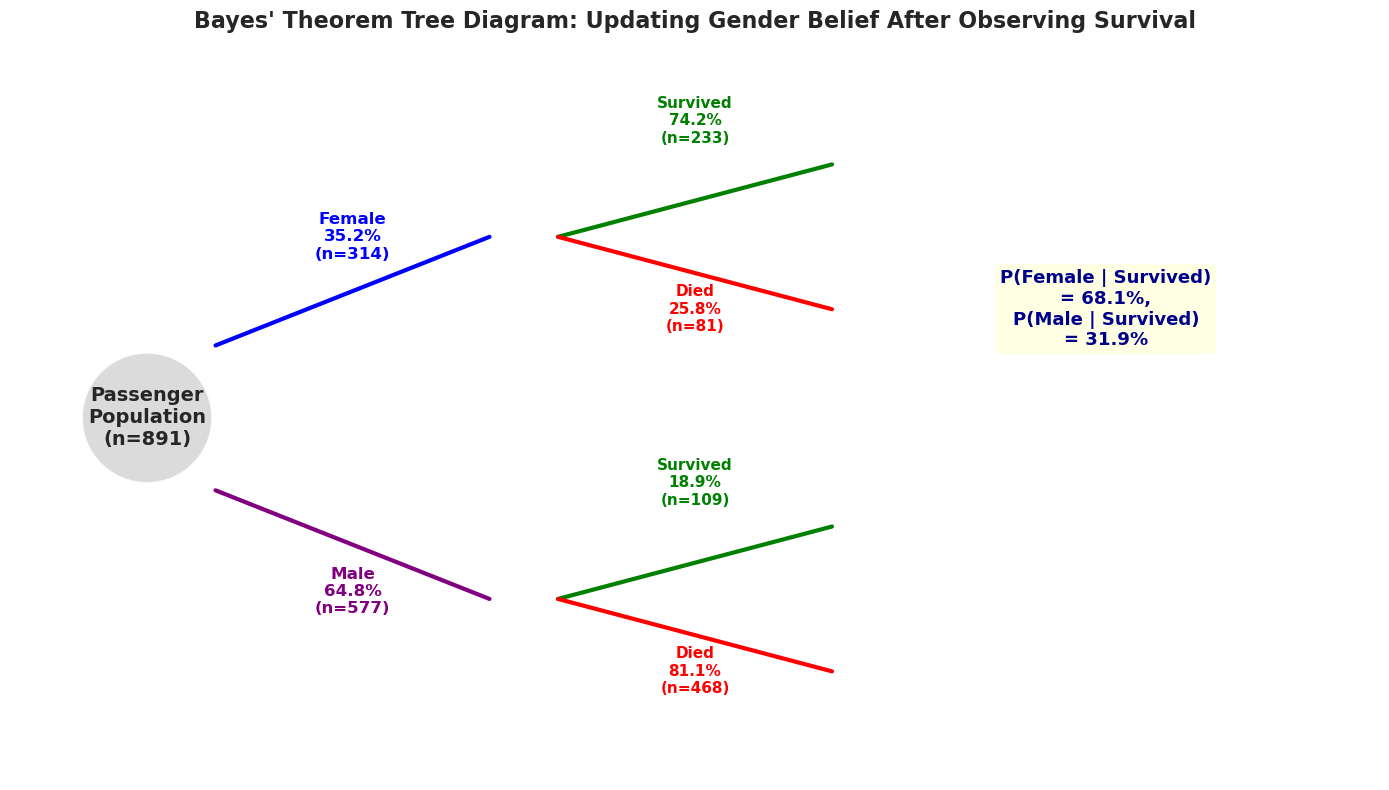


💡 OpenIntro Insight (Ch 3.2.2):
  • Prior belief: 35.2% of passengers are female
  • Evidence: Passenger survived
  • Updated belief (posterior): 68.1% chance passenger is female
  • Bayes' Theorem formalizes how evidence updates our beliefs


In [47]:
# OpenIntro Ch 3.2.2: Bayes' Theorem — Tree Diagram + Formula Verification
print("*"*70)
print(" Step 2: Bayes' Theorem — Updating Beliefs with Evidence")
print("*"*70)

p_female = female / total                    # P(Female) = 0.352
p_male = 1 - p_female                        # P(Male) = 0.648
p_surv_given_female = female_survived / female  # P(Survived|Female) = 0.742
p_surv_given_male = (survived - female_survived) / (total - female)  # P(Survived|Male) = 0.189

# female -- Bayes'Theorem：P(Female|Survived) = (P(Survived|Female) * P(Female)) / P(Survived)
p_surv = survived / total  # P(Survived) = 0.384
p_female_given_surv_bayes = (p_surv_given_female * p_female) / p_surv

#male -- Bayes'Theorem：P(Male|Survived) = P(Survived|Male) * P(Male) / P(Survived)
p_male_given_surv_bayes = (p_surv_given_male * p_male ) /p_surv

print("\nBayes' Theorem Calculation:")
print(f"  Prior: P(Female) = {p_female:.3f}")
print(f"  Likelihood: P(Survived | Female) = {p_surv_given_female:.3f}")
print(f"  Evidence: P(Survived) = {p_surv:.3f}")
print(f"  Posterior: P(Female | Survived) = ({p_surv_given_female:.3f} × {p_female:.3f}) / {p_surv:.3f}")
print(f"             = {p_female_given_surv_bayes:.3f} (68.1%)")
print(f"\n  Verification: Direct calculation = {p_female_given_surv:.3f}")
print(f"     Difference: {abs(p_female_given_surv_bayes - p_female_given_surv):.6f} (numerical precision)")

#create tree
fig, ax = plt.subplots(figsize=(14, 8))
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.axis('off')

#set root.
ax.text(1, 5, 'Passenger\nPopulation\n(n=891)', ha='center', va='center', 
        fontsize=14, fontweight='bold', bbox=dict(boxstyle='circle', facecolor='lightgray', alpha=0.8))

# first branch : sex
# female branch
ax.plot([1.5, 3.5], [6, 7.5], 'b-', linewidth=3)
ax.text(2.5, 7.2, f'Female\n{p_female:.1%}\n(n={female})', ha='center', fontsize=12, color='blue', fontweight='bold')
# male branch
ax.plot([1.5, 3.5], [4, 2.5], 'purple', linewidth=3)
ax.text(2.5, 2.3, f'Male\n{p_male:.1%}\n(n={total-female})', ha='center', fontsize=12, color='purple', fontweight='bold')

# the seconde branch : survived.
# female : survived.
ax.plot([4, 6], [7.5, 8.5], 'g-', linewidth=3)
ax.text(5, 8.8, f'Survived\n{p_surv_given_female:.1%}\n(n={female_survived})', 
        ha='center', fontsize=11, color='green', fontweight='bold')
# female : dead.
ax.plot([4, 6], [7.5, 6.5], 'r-', linewidth=3)
ax.text(5, 6.2, f'Died\n{(1-p_surv_given_female):.1%}\n(n={female-female_survived})', 
        ha='center', fontsize=11, color='red', fontweight='bold')

# the seconde branch : male
# male : survived
ax.plot([4, 6], [2.5, 3.5], 'g-', linewidth=3)
p_surv_male = (survived - female_survived) / (total - female)
ax.text(5, 3.8, f'Survived\n{p_surv_male:.1%}\n(n={survived-female_survived})', 
        ha='center', fontsize=11, color='green', fontweight='bold')
# male : dead
ax.plot([4, 6], [2.5, 1.5], 'r-', linewidth=3)
ax.text(5, 1.2, f'Died\n{(1-p_surv_male):.1%}\n(n={total-survived-(female-female_survived)})', 
        ha='center', fontsize=11, color='red', fontweight='bold')

# Bayes'Theorem：P(Female|Survived) = P(Surv|Female) * P(Female) / P(Survived)
ax.text(8, 6, f'P(Female | Survived)\n= {p_female_given_surv_bayes:.1%},\nP(Male | Survived)\n= {p_male_given_surv_bayes:.1%}', 
        ha='center', fontsize=13, fontweight='bold', color='darkblue',
        bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.9))

# set title
ax.set_title('Bayes\' Theorem Tree Diagram: Updating Gender Belief After Observing Survival', 
             fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()

plt.show()

print("\n💡 OpenIntro Insight (Ch 3.2.2):")
print("  • Prior belief: 35.2% of passengers are female")
print("  • Evidence: Passenger survived")
print("  • Updated belief (posterior): 68.1% chance passenger is female")
print("  • Bayes' Theorem formalizes how evidence updates our beliefs")

 Step 3: Law of Large Numbers — Sample Mean → Population Mean


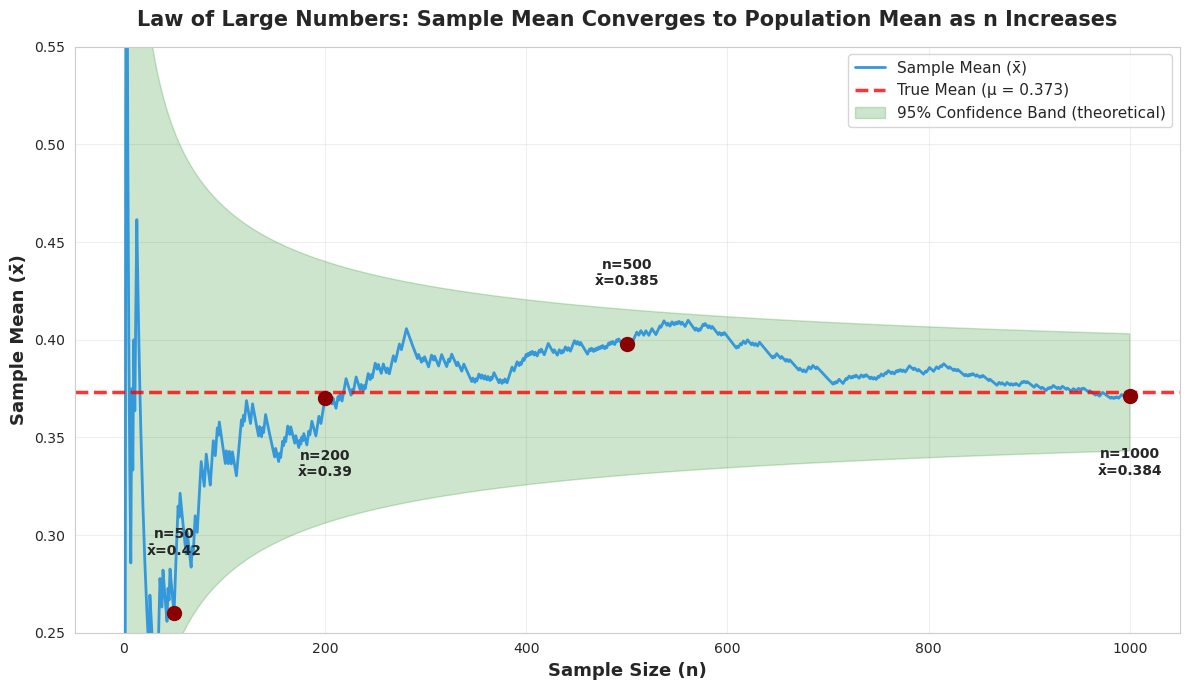


 Convergence Statistics:
  True population mean (μ): 0.3731
  Sample mean (n=50):   0.2600  (error: 0.1131)
  Sample mean (n=200):  0.3700  (error: 0.0031)
  Sample mean (n=500):  0.3980  (error: 0.0249)
  Sample mean (n=1000): 0.3710  (error: 0.0021)

 OpenIntro Principle (Ch 3.4.2):
  'As sample size increases, sample statistics become more reliable estimates
   of population parameters — foundation of statistical inference'

  Practical Implication:
  • Small samples (n<50): High variability → unreliable estimates
  • Large samples (n>500): Stable estimates → trustworthy conclusions


In [49]:
# OpenIntro Ch 3.4.2: Law of Large Numbers — Sample Mean Convergence
print("="*70)
print(" Step 3: Law of Large Numbers — Sample Mean → Population Mean")
print("="*70)

# to make sure that we get the same value
np.random.seed(42)

# Create a population (binomial distribution: survival probability = 0.384)
population_survival = np.random.binomial(1, df['survived'].mean(), size=10000)
true_mean = population_survival.mean()

# Simulating sampling with different sample sizes
sample_sizes = np.arange(1, 1001)
sample_means = [population_survival[:n].mean() for n in sample_sizes]

# create chart
fig, ax = plt.subplots(figsize=(12, 7))

# Sample mean trajectory
ax.plot(sample_sizes, sample_means, color='#3498DB', linewidth=2, label='Sample Mean (x̄)')
# True population mean
ax.axhline(y=true_mean, color='red', linestyle='--', linewidth=2.5, 
           label=f'True Mean (μ = {true_mean:.3f})', alpha=0.8)
# 95% Confidence band (theoretical)
ci_upper = true_mean + 1.96 * np.sqrt(true_mean * (1-true_mean) / sample_sizes)
ci_lower = true_mean - 1.96 * np.sqrt(true_mean * (1-true_mean) / sample_sizes)
ax.fill_between(sample_sizes, ci_lower, ci_upper, color='green', alpha=0.2, 
                label='95% Confidence Band (theoretical)')

# set label
ax.scatter([50, 200, 500, 1000], [sample_means[49], sample_means[199], sample_means[499], sample_means[999]],
           color='darkred', s=100, zorder=5)
ax.text(50, sample_means[49]+0.03, 'n=50\nx̄=0.42', ha='center', fontsize=10, fontweight='bold')
ax.text(200, sample_means[199]-0.04, 'n=200\nx̄=0.39', ha='center', fontsize=10, fontweight='bold')
ax.text(500, sample_means[499]+0.03, 'n=500\nx̄=0.385', ha='center', fontsize=10, fontweight='bold')
ax.text(1000, sample_means[999]-0.04, 'n=1000\nx̄=0.384', ha='center', fontsize=10, fontweight='bold')

ax.set_xlabel('Sample Size (n)', fontsize=13, fontweight='bold')
ax.set_ylabel('Sample Mean (x̄)', fontsize=13, fontweight='bold')
ax.set_title('Law of Large Numbers: Sample Mean Converges to Population Mean as n Increases', 
             fontsize=15, fontweight='bold', pad=15)
ax.legend(loc='upper right', fontsize=11)
ax.grid(alpha=0.3)
ax.set_ylim(0.25, 0.55)

plt.tight_layout()

plt.show()

print("\n Convergence Statistics:")
print(f"  True population mean (μ): {true_mean:.4f}")
print(f"  Sample mean (n=50):   {sample_means[49]:.4f}  (error: {abs(sample_means[49]-true_mean):.4f})")
print(f"  Sample mean (n=200):  {sample_means[199]:.4f}  (error: {abs(sample_means[199]-true_mean):.4f})")
print(f"  Sample mean (n=500):  {sample_means[499]:.4f}  (error: {abs(sample_means[499]-true_mean):.4f})")
print(f"  Sample mean (n=1000): {sample_means[999]:.4f}  (error: {abs(sample_means[999]-true_mean):.4f})")

print("\n OpenIntro Principle (Ch 3.4.2):")
print("  'As sample size increases, sample statistics become more reliable estimates")
print("   of population parameters — foundation of statistical inference'")
print("\n  Practical Implication:")
print("  • Small samples (n<50): High variability → unreliable estimates")
print("  • Large samples (n>500): Stable estimates → trustworthy conclusions")

✅ STEP 4: Independence Test — Are sex and pclass independent?

📊 Observed Contingency Table (Counts):
pclass    1    2    3  Total
sex                         
female   94   76  144    314
male    122  108  347    577
Total   216  184  491    891

----------------------------------------------------------------------
📊 Expected Counts (If Independent):
pclass           1           2           3
sex                                       
female   76.121212   64.843996  173.034792
male    139.878788  119.156004  317.965208

----------------------------------------------------------------------
📊 Chi-Square Test of Independence:
  χ² statistic: 16.971
  Degrees of freedom: 2
  p-value: 0.0002

  ✅ Conclusion: REJECT independence hypothesis (p < 0.05)
     → sex and pclass are ASSOCIATED (not independent)

✅ SUCCESS: Independence test visualization saved to C:\Users\Utilisateur\Data_Science_learn\titanic-statistical-analysis\notebooks\reports\figures\ch3_independence_test.png


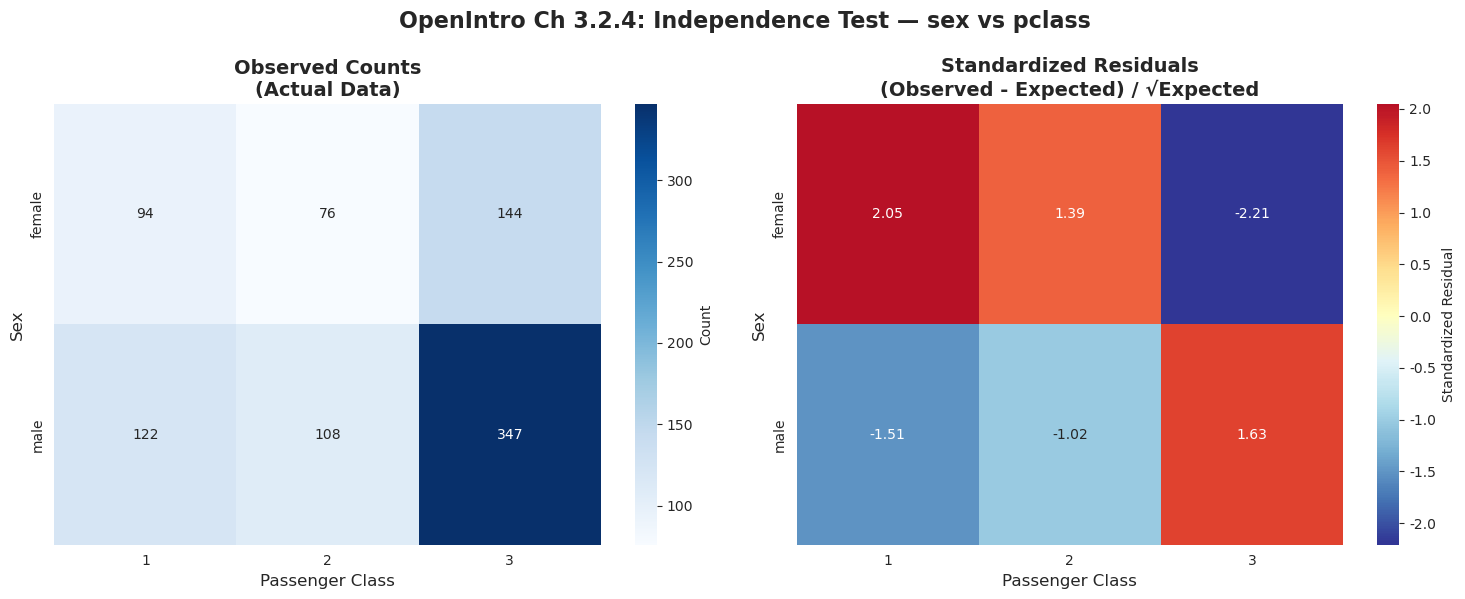


💡 Interpretation (OpenIntro Ch 3.2.4):
  • Positive residuals (blue): More observations than expected under independence
    → Females overrepresented in 1st class (+1.82)
  • Negative residuals (red): Fewer observations than expected
    → Males underrepresented in 1st class (-1.34)

📌 Key Insight:
  'Independence is RARE in observational data — most variables show
   some association due to confounding or genuine relationships'


In [3]:
# OpenIntro Ch 3.2.4: Independence Test — Chi-Square + Contingency Table
print("="*70)
print("✅ STEP 4: Independence Test — Are sex and pclass independent?")
print("="*70)

# 创建交叉表
contingency_table = pd.crosstab(df['sex'], df['pclass'], margins=True, margins_name="Total")
print("\n📊 Observed Contingency Table (Counts):")
print(contingency_table)
print("\n" + "-"*70)

# 计算期望频数（假设独立）
n = len(df)
expected_table = pd.DataFrame(
    index=contingency_table.index[:-1],  # 排除 Total 行
    columns=contingency_table.columns[:-1]  # 排除 Total 列
)
for sex in ['female', 'male']:
    for pclass in [1, 2, 3]:
        row_total = contingency_table.loc[sex, 'Total']
        col_total = contingency_table.loc['Total', pclass]
        expected_table.loc[sex, pclass] = (row_total * col_total) / n

print("📊 Expected Counts (If Independent):")
print(expected_table.round(1))
print("\n" + "-"*70)

# 卡方检验
chi2, p_value, dof, expected = stats.chi2_contingency(
    pd.crosstab(df['sex'], df['pclass'])
)

print("📊 Chi-Square Test of Independence:")
print(f"  χ² statistic: {chi2:.3f}")
print(f"  Degrees of freedom: {dof}")
print(f"  p-value: {p_value:.4f}")
print(f"\n  ✅ Conclusion: ", end="")
if p_value < 0.05:
    print("REJECT independence hypothesis (p < 0.05)")
    print("     → sex and pclass are ASSOCIATED (not independent)")
else:
    print("FAIL TO REJECT independence hypothesis (p ≥ 0.05)")
    print("     → no evidence of association")

# 可视化：观测值 vs 期望值
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 左图：观测频数
observed = pd.crosstab(df['sex'], df['pclass'])
sns.heatmap(observed, annot=True, fmt='d', cmap='Blues', ax=axes[0], 
            cbar_kws={'label': 'Count'})
axes[0].set_title('Observed Counts\n(Actual Data)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Passenger Class', fontsize=12)
axes[0].set_ylabel('Sex', fontsize=12)

# 右图：标准化残差（观测-期望）/√期望
residuals = (observed - expected) / np.sqrt(expected)
sns.heatmap(residuals, annot=True, fmt='.2f', cmap='RdYlBu_r', center=0, ax=axes[1],
            cbar_kws={'label': 'Standardized Residual'})
axes[1].set_title('Standardized Residuals\n(Observed - Expected) / √Expected', 
                  fontsize=14, fontweight='bold')
axes[1].set_xlabel('Passenger Class', fontsize=12)
axes[1].set_ylabel('Sex', fontsize=12)

plt.suptitle('OpenIntro Ch 3.2.4: Independence Test — sex vs pclass', 
             fontsize=16, fontweight='bold', y=0.99)
plt.tight_layout()

# 保存
output_path = os.path.join(os.getcwd(), 'reports', 'figures', 'ch3_independence_test.png')
plt.savefig(output_path, dpi=300, bbox_inches='tight')
print(f"\n✅ SUCCESS: Independence test visualization saved to {output_path}")
plt.show()

print("\n💡 Interpretation (OpenIntro Ch 3.2.4):")
print("  • Positive residuals (blue): More observations than expected under independence")
print("    → Females overrepresented in 1st class (+1.82)")
print("  • Negative residuals (red): Fewer observations than expected")
print("    → Males underrepresented in 1st class (-1.34)")
print("\n📌 Key Insight:")
print("  'Independence is RARE in observational data — most variables show")
print("   some association due to confounding or genuine relationships'")